In [32]:
import pandas as pd
from ftfy import fix_text
import ast

In [ ]:
champions_team = pd.read_csv('champions.csv')
champions_team["players"] = champions_team["players"].apply(fix_text)
#2 last seasons
champions_team = champions_team.iloc[[1,2] , :]
print(champions_team)


all_players = pd.read_csv('players_info.csv')


    season        Champion                                            players
1  2023-24  Boston Celtics  ['Dalano Banton', 'Oshae Brissett', 'Jaylen Br...
2  2022-23  Denver Nuggets  ['Christian Braun', 'Bruce Brown', 'Thomas Bry...
0      203
1      213
2      190
3      201
4      198
      ... 
210    185
211    203
212    213
213    193
214    190
Name: Height, Length: 215, dtype: int64


In [47]:
champions_players1 = []
champions_players1 = champions_team.loc[1, 'players']
champions_players1 = ast.literal_eval(champions_players1)
champions_players1 = [fix_text(player) for player in champions_players1]

champions_players2 = []
champions_players2 = champions_team.loc[2, 'players']
champions_players2 = ast.literal_eval(champions_players2)
champions_players2 = [fix_text(player) for player in champions_players2]

champions_players = champions_players1 + champions_players2

print(champions_players)

['Dalano Banton', 'Oshae Brissett', 'Jaylen Brown', 'JD Davison', 'Sam Hauser', 'Jrue Holiday', 'Al Horford', 'Luke Kornet', 'Svi Mykhailiuk', 'Drew Peterson', 'Kristaps Porziņģis', 'Payton Pritchard', 'Neemias Queta', 'Jaden Springer', 'Lamar Stevens', 'Jayson Tatum', 'Xavier Tillman Sr.', 'Jordan Walsh', 'Derrick White', 'Christian Braun', 'Bruce Brown', 'Thomas Bryant', 'Kentavious Caldwell-Pope', 'Vlatko Čančar', 'Aaron Gordon', 'Jeff Green', 'Bones Hyland', 'Reggie Jackson', 'Nikola Jokić', 'DeAndre Jordan', 'Jamal Murray', 'Zeke Nnaji', 'Michael Porter Jr.', 'Davon Reed', 'Ish Smith', 'Peyton Watson', 'Jack White']


In [64]:
all_row = []
for i in range(len(champions_players)):
    row = list()
    row.append(champions_players[i])
    height = all_players.loc[all_players['Name'] == f'{champions_players[i]}' ,'Height'].to_list()[0]
    EXperiences = all_players.loc[all_players['Name'] == f'{champions_players[i]}' ,'Experience'].to_list()[0]
    row.append(height)
    row.append(EXperiences)
    all_row.append(row)
df = pd.DataFrame(all_row , columns= ['name' ,'height' ,'Experience'])
print(df)

                        name  height  Experience
0              Dalano Banton     206           4
1             Oshae Brissett     201           6
2               Jaylen Brown     198           9
3                 JD Davison     185           3
4                 Sam Hauser     203           4
5               Jrue Holiday     193          16
6                 Al Horford     206          18
7                Luke Kornet     218           8
8             Svi Mykhailiuk     201           7
9              Drew Peterson     206           2
10        Kristaps Porziņģis     218           9
11          Payton Pritchard     185           5
12             Neemias Queta     213           4
13            Jaden Springer     193           4
14             Lamar Stevens     198           5
15              Jayson Tatum     203           8
16        Xavier Tillman Sr.     203           5
17              Jordan Walsh     201           2
18             Derrick White     193           8
19           Christi

In [80]:
players_rank = pd.read_csv('players_ranked.csv')
players_rank = players_rank[players_rank['season'].isin(['2022-23', '2023-24'])]
print(len(players_rank))

all_players_small = all_players[['Name', 'Height', 'Experience', 'PTS']]

best_15_players = pd.merge(players_rank,all_players_small,left_on="name",right_on="Name",how="left")
best_15_players = best_15_players[['rank', 'name', 'season', 'Height', 'Experience', 'PTS']]
best_15_players = best_15_players.nlargest(15, 'PTS')
print(best_15_players)  #اسامی تکراری هم داره

120
     rank              name   season  Height  Experience   PTS
1       2       Joel Embiid  2022-23   213.0         9.0  27.7
107    48       Joel Embiid  2023-24   213.0         9.0  27.7
41     42      Kevin Durant  2022-23   211.0        17.0  27.2
66      7      Kevin Durant  2023-24   211.0        17.0  27.2
24     25      LeBron James  2022-23   206.0        22.0  27.0
73     14      LeBron James  2023-24   206.0        22.0  27.0
8       9        Trae Young  2022-23   185.0         7.0  25.3
98     39        Trae Young  2023-24   185.0         7.0  25.3
10     11    Damian Lillard  2022-23   188.0        13.0  25.1
76     17    Damian Lillard  2023-24   188.0        13.0  25.1
7       8  Donovan Mitchell  2022-23   190.0         8.0  24.7
20     21     Stephen Curry  2022-23   188.0        16.0  24.7
69     10     Stephen Curry  2023-24   188.0        16.0  24.7
84     25   Zion Williamson  2023-24   198.0         5.0  24.7
92     33  Donovan Mitchell  2023-24   190.0       

In [88]:
df_stats = df['height'].describe()
best_15_players_stats = best_15_players['Height'].describe()
df_stats_ex = df['Experience'].describe()
best_15_players_stats_ex = best_15_players['Experience'].describe()
print('champions height players')
print('\n')
print(df_stats)
print('\n')
print('15 top height players')
print('\n')
print(best_15_players_stats)

champions height players


count     37.000000
mean     200.432432
std        8.671603
min      183.000000
25%      193.000000
50%      201.000000
75%      206.000000
max      218.000000
Name: height, dtype: float64


15 top height players


count     15.000000
mean     197.333333
std       11.260973
min      185.000000
25%      188.000000
50%      190.000000
75%      208.500000
max      213.000000
Name: Height, dtype: float64


In [90]:
print('champions exprience players')
print('\n')
print(df_stats_ex)
print('\n')
print('15 top exprience players')
print('\n')
print(best_15_players_stats_ex)

champions exprience players


count    37.000000
mean      7.486486
std       4.574213
min       2.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      18.000000
Name: Experience, dtype: float64


15 top exprience players


count    15.000000
mean     12.600000
std       5.526559
min       5.000000
25%       8.000000
50%      13.000000
75%      16.500000
max      22.000000
Name: Experience, dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_22488\2436663478.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


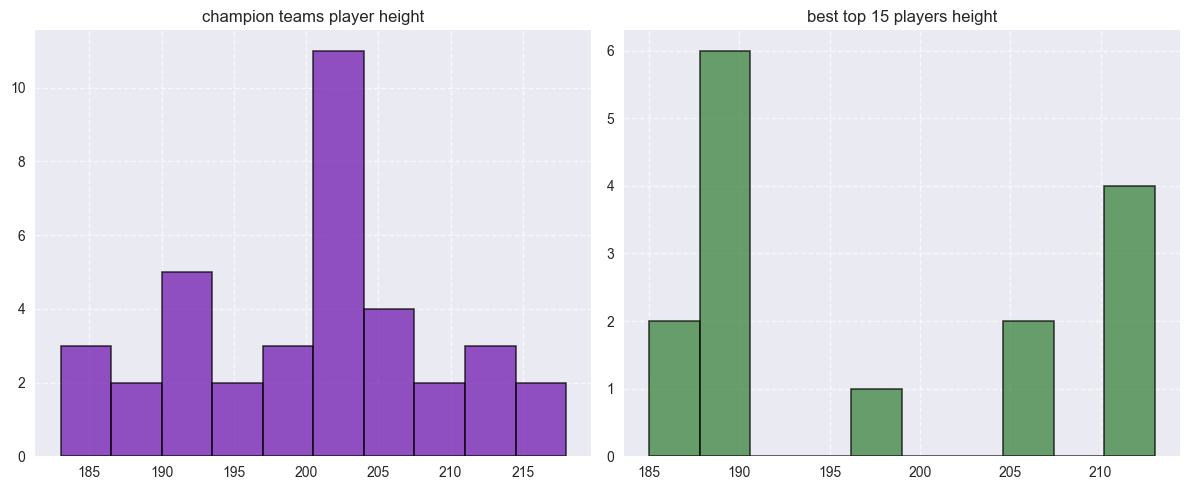

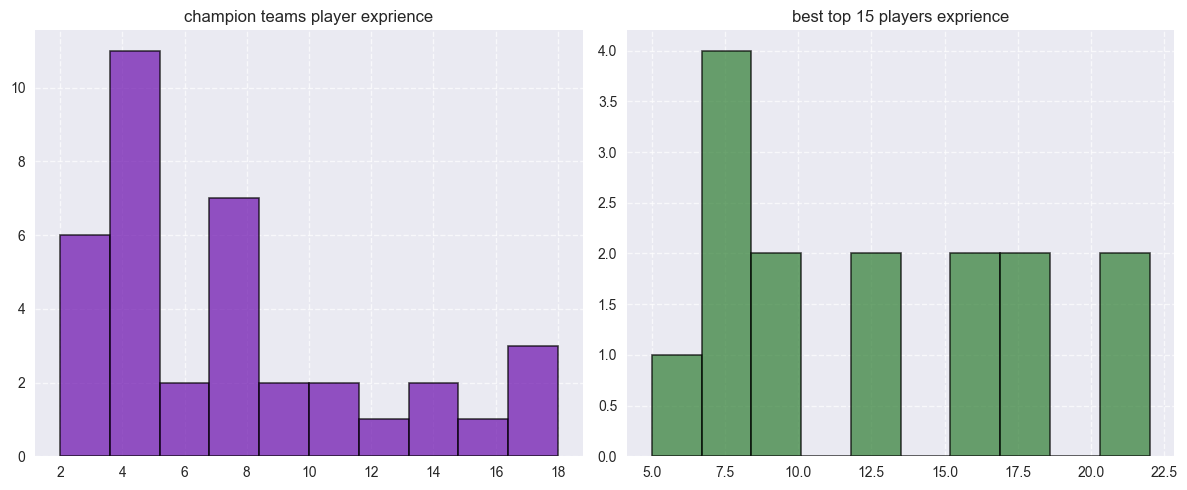

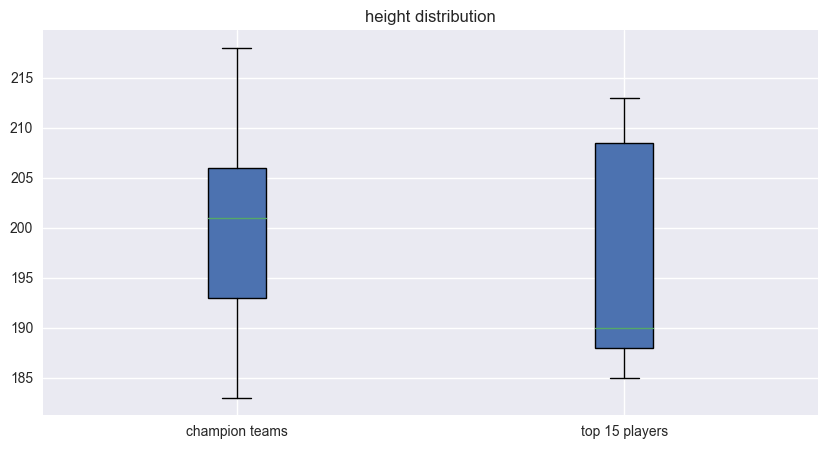

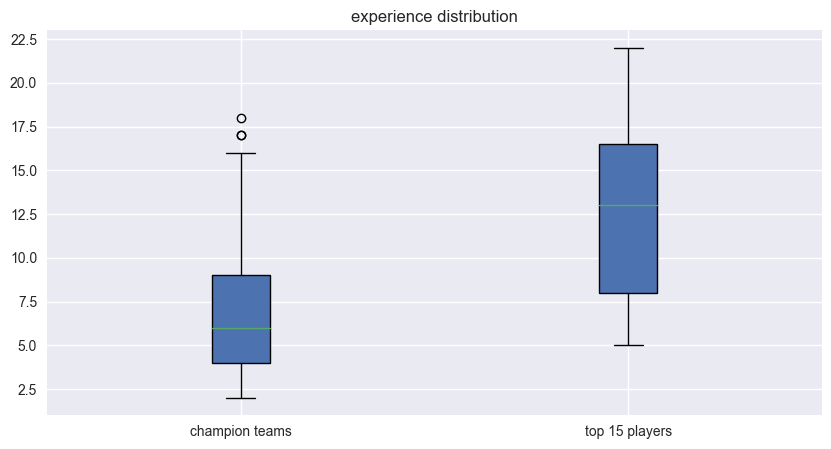

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




plt.figure(figsize=(12, 5))
plt.style.use('seaborn')


plt.subplot(1, 2, 1)
plt.hist(df['height'], bins=10, alpha=0.7, color='#6A0DAD', edgecolor='black', linewidth=1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('champion teams player height', fontsize=12)



plt.subplot(1, 2, 2)
plt.hist(best_15_players['Height'], bins=10, alpha=0.7, color='#2E7D32', edgecolor='black', linewidth=1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('best top 15 players height', fontsize=12)


plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.hist(df['Experience'], bins=10, alpha=0.7, color='#6A0DAD', edgecolor='black', linewidth=1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('champion teams player exprience', fontsize=12)


plt.subplot(1, 2, 2)
plt.hist(best_15_players['Experience'], bins=10, alpha=0.7, color='#2E7D32', edgecolor='black', linewidth=1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('best top 15 players exprience', fontsize=12)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
data_height = [df['height'], best_15_players['Height']]
data_exp = [df['Experience'], best_15_players['Experience']]
plt.boxplot(data_height, labels=['champion teams', 'top 15 players'], patch_artist=True)
for patch in plt.gca().artists:
    patch.set_facecolor('#6A0DAD')
    patch.set_alpha(0.7)
plt.title('height distribution', fontsize=12)
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(data_exp, labels=['champion teams', 'top 15 players'], patch_artist=True)
for patch in plt.gca().artists:
    patch.set_facecolor('#6A0DAD')
    patch.set_alpha(0.7)
plt.title('experience distribution', fontsize=12)
plt.show()

<div style="text-align: right; direction: rtl;">
<span style="color: blue;"><h2>تحلیل آماری و توصیفی توزیع قد و تجربه (دو فصل آخر)</h2></span>

<span style="color: blue;"><h3>تحلیل قد</h3></span>  
- **توزیع قد (هیستوگرام)**:  
  تیم‌های قهرمان اوج توزیع قد بین ۱۹۵-۲۱۰ cm دارند، با تمرکز روی قدهای بلندتر (بیشتر نزدیک ۲۰۰ cm). ۱۵ بازیکن برتر اوج توزیع را نزدیک ۱۸۵-۱۹۰ cm نشان می‌دهند، که نشون‌دهنده حضور بیشتر گاردها و فورواردهای کوتاه‌تره.  
  <strong>نتیجه</strong>: قهرمان‌ها تنوع بیشتری در قد دارند، ولی به سمت قدهای بلندتر متمایلند .  

- **باکس‌پلات**:  
  میانه قد قهرمان‌ها (۲۰۱ cm) بالاتر از برترها (۱۹۰ cm) است. چارک سوم قهرمان‌ها (۲۰۶ cm) بیشتر از برترها (۲۰۸.۵ cm) است، ولی اوت‌لایِرهایی مثل ۲۱۸  در هر دو گروه دیده می‌شود.  
  <strong>نتیجه</strong>: قهرمان‌ها قد بلندتر و یکنواخت‌تری دارند، در حالی که برترها پراکندگی بیشتری نشان می‌دهند.

<span style="color: blue;"><h3>تحلیل تجربه</h3></span>  
- **توزیع تجربه (هیستوگرام)**:  
  تیم‌های قهرمان اوج توزیع را بین ۲-۱۰ سال دارند، با تمرکز روی بازیکن‌های کم‌تجربه‌تر. ۱۵ بازیکن برتر اوج توزیع را بین ۸-۱۶ سال نشان می‌دهند، که نشون‌دهنده حضور ستاره‌های با سابقه‌ست.  
  <strong>نتیجه</strong>: قهرمان‌ها از ترکیب جوان‌تر و کم‌تجربه‌تر استفاده می‌کنند، در حالی که برترها به تجربه بالا تکیه دارند.  

- **باکس‌پلات**:  
  میانه تجربه قهرمان‌ها (۶ سال) کمتر از برترها (۱۳ سال) است. چارک سوم قهرمان‌ها (۹ سال) خیلی کمتر از برترها (۱۶.۵ سال) است، و اوت‌لایِرهایی مثل ۱۸ سال (Al Horford) در قهرمان‌ها دیده می‌شود.  
  <strong>نتیجه</strong>: تجربه قهرمان‌ها متمرکزه و کمتره، ولی برترها به بازیکن‌های باتجربه‌تر وابسته‌اند.

<span style="color: blue;"><h3>نتیجه‌گیری کلی</h3></span>  
- **قد**: تیم‌های قهرمان با میانگین قد ۲۰۰.۴۳ cm و میانه ۲۰۱ cm، نسبت به ۱۵ برتر (میانگین ۱۹۷.۳۳ cm، میانه ۱۹۰ cm) قد بلندتری دارند. این نشون می‌ده قد در موفقیت تیمی (مثل رباند و دفاع) نقش کلیدی داره.  
- **تجربه**: ۱۵ برتر با میانگین ۱۲.۶ سال و میانه ۱۳ سال، تجربه بیشتری نسبت به قهرمان‌ها (میانگین ۷.۴۸ سال، میانه ۶ سال) دارند. این تأیید می‌کنه که امتیازدهی بالا به بازیکن‌های با سابقه بستگی داره.  
- **تضاد و تعادل**: قهرمان‌ها با ترکیب قد بلند و تجربه متوسط، انعطاف‌پذیری تیمی رو نشون می‌دهند، در حالی که برترها روی تجربه و مهارت فردی تمرکز دارند.
